In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)  ##Semilla

In [2]:
from google.colab import files
files.upload=files.upload()

Saving dataset_Facebook.csv to dataset_Facebook (4).csv


In [3]:
Datos=pd.read_csv('dataset_Facebook.csv',delimiter=";",skiprows=1,names=["Total Me gustas","Tipo","Categoria","Pub mes","Pub semana","Pub hora",
                                                                         "Pagado","Alcance Pub","Impresión Pub","Usuarios compromeditos","Consumidores de Pub",
                                                                         "Consumos de Pub","Imp pub de  personas que les ha gustado tu pagina",
                                                                         "Pub de  personas que les ha gustado tu pagina","Alcance pub de  personas que les ha gustado tu pagina",
                                                                         "Comentarios","Me gusta","Cuota","Interacciones totales"])


In [4]:
print("Tengo N=",len(Datos),"Instancias")

Tengo N= 500 Instancias


In [5]:
print("Tengo M=",len(Datos.columns),"Atributos")  # Numero de columnas

Tengo M= 19 Atributos


In [6]:
Perdidos_1=Datos[Datos.isna().any(axis=1)] 
print("Tengo N=",len(Perdidos_1),"datos perdidos")

Tengo N= 5 datos perdidos


In [7]:
Datos2=Datos##Para no reiniciar el Entorno

In [8]:
Datos2.dtypes ##Miramos que atributo es categorico para eliminarlo y trabajar solo con los numericos

Total Me gustas                                            int64
Tipo                                                      object
Categoria                                                  int64
Pub mes                                                    int64
Pub semana                                                 int64
Pub hora                                                   int64
Pagado                                                   float64
Alcance Pub                                                int64
Impresión Pub                                              int64
Usuarios compromeditos                                     int64
Consumidores de Pub                                        int64
Consumos de Pub                                            int64
Imp pub de  personas que les ha gustado tu pagina          int64
Pub de  personas que les ha gustado tu pagina              int64
Alcance pub de  personas que les ha gustado tu pagina      int64
Comentarios              

In [10]:
Datos2=Datos2.select_dtypes(include=['int64',"float64"]) #Eliminamos la columna o atributo Tipo que es categorica y deja los numericos
## OJO PROBAR CON  get_dummies para qe se etengan en cuenta las variables categoricas ya que esta funcion convierte en numeros la variable categorica

In [11]:
##VAMOS A CREAR NAN ALEATORIOS EN LA DATA  .. CON EL SIGUIENTE CÓDIGO
length = len(Datos2)
for i in Datos2.columns[:-3]:
    num = int(np.random.randint(0,10)/100*length)
    idx_replace = np.random.randint(0, length-1, num)
    Datos2.loc[idx_replace, i] = np.nan

In [14]:
Perdidos=Datos2[Datos2.isna().any(axis=1)] # De los datos busca los NAN  .any en cualquier lado
#axis=1 por filas. Muestra las filas con almeno un nan sicolocamos el len encontramos el numeros de NAN
#len(Perdidos)  ##5 datos perdidos  ojoel axis= busca por filas y axis=0 busca por columnas
print("Tengo N=",len(Perdidos),"datos perdidos") #acá solo cuenta las filas de perdidos y no todos los datos si hay mas de 1 en una fila

Tengo N= 251 datos perdidos


In [13]:
Datos2.isnull().sum() #cuantos datos perdidos hay por variables 

Total Me gustas                                          10
Categoria                                                 0
Pub mes                                                   5
Pub semana                                                0
Pub hora                                                 45
Pagado                                                   21
Alcance Pub                                               5
Impresión Pub                                            10
Usuarios compromeditos                                   44
Consumidores de Pub                                      38
Consumos de Pub                                          39
Imp pub de  personas que les ha gustado tu pagina        15
Pub de  personas que les ha gustado tu pagina            31
Alcance pub de  personas que les ha gustado tu pagina    34
Comentarios                                              38
Me gusta                                                  1
Cuota                                   

In [15]:
#VARIAS COPIAS
Datos3=Datos2.copy()
Datos4=Datos2.copy()
Datos5=Datos2.copy()

In [16]:
Datos3.isnull().sum() #cuantos datos perdidos hay por variables 

Total Me gustas                                          10
Categoria                                                 0
Pub mes                                                   5
Pub semana                                                0
Pub hora                                                 45
Pagado                                                   21
Alcance Pub                                               5
Impresión Pub                                            10
Usuarios compromeditos                                   44
Consumidores de Pub                                      38
Consumos de Pub                                          39
Imp pub de  personas que les ha gustado tu pagina        15
Pub de  personas que les ha gustado tu pagina            31
Alcance pub de  personas que les ha gustado tu pagina    34
Comentarios                                              38
Me gusta                                                  1
Cuota                                   

In [17]:
Datos3.head(10)

,Total Me gustas,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,Consumos de Pub,Imp pub de personas que les ha gustado tu pagina,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,NaN,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441.0,3.0,12.0,3.0,NaN,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,NaN,790.0,NaN,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,NaN,325.0,49.0,393
5,139441.0,2.0,12.0,1.0,9.0,0.0,10472.0,20849.0,1191.0,1073.0,1389.0,16034.0,7852.0,1016.0,1.0,152.0,33.0,186
6,139441.0,3.0,12.0,1.0,3.0,1.0,11692.0,19479.0,481.0,265.0,364.0,15432.0,9328.0,379.0,3.0,249.0,27.0,279
7,139441.0,3.0,12.0,7.0,9.0,1.0,13720.0,24137.0,537.0,232.0,305.0,19728.0,11056.0,NaN,0.0,325.0,14.0,339
8,139441.0,2.0,12.0,7.0,3.0,0.0,11844.0,22538.0,1530.0,1407.0,1692.0,15220.0,7912.0,1250.0,0.0,161.0,31.0,192
9,139441.0,3.0,12.0,6.0,10.0,0.0,4694.0,8668.0,280.0,183.0,250.0,4309.0,2324.0,199.0,3.0,113.0,26.0,142


In [18]:
import random
def impute_nan_meanmedian(df, variable, value):  #Con esta funcion en la variable del otro codigo siguiente ingresala media en los NAN o lamediana
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    return df


def rand_float_range(start, end):  #Es tas función inserta en los NAN Un número aleatorio de la variable o un numero que asignemos 
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df  
    ###TAREA CON ESTE METODO RELLENAR TODOSLOS ATRIBUTOS CON UN FOR 

In [19]:
impute_nan_meanmedian(Datos3, "Pub hora", "mean")  ##CREA OTRA COLUMNA CON EL MISMO NOMBRE MASS _  CON LOS QUE REEMPLAZAMOS CON LA MEDIA head muestra solo 10 filas
impute_nan_meanmedian(Datos3, "Pub hora", "median") ##CREA OTRA COLUMNA CON EL MISMO NOMBRE MASS _  CON LOS QUE REEMPLAZAMOS CON LA MEDIA

impute_nan_random(Datos3, "Pub hora", -9)# rellenamos con numeros aleatorio
impute_nan_random(Datos3, "Pub hora", 5)# rellenamos con 3

,Total Me gustas,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,...,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales,Pub hora_mean,Pub hora_median,Pub hora_random,Pub hora_random_fixed
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,...,1640.0,119.0,4.0,79.0,17.0,100,3.000000,3.0,3.000000,3.0
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,NaN,1457.0,1361.0,...,6112.0,1108.0,5.0,130.0,29.0,164,10.000000,10.0,10.000000,10.0
2,139441.0,3.0,12.0,3.0,NaN,0.0,2413.0,4373.0,177.0,113.0,...,1503.0,132.0,0.0,66.0,14.0,80,7.881319,9.0,4.648995,5.0
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,NaN,790.0,...,32048.0,1386.0,58.0,1572.0,147.0,1777,10.000000,10.0,10.000000,10.0
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,...,3200.0,396.0,NaN,325.0,49.0,393,3.000000,3.0,3.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093.0,3.0,1.0,7.0,2.0,0.0,4684.0,7536.0,733.0,708.0,...,2876.0,392.0,5.0,53.0,26.0,84,2.000000,2.0,2.000000,2.0
496,81370.0,2.0,1.0,5.0,8.0,0.0,3480.0,6229.0,537.0,NaN,...,2104.0,301.0,0.0,53.0,22.0,75,8.000000,8.0,8.000000,8.0
497,81370.0,1.0,1.0,5.0,2.0,0.0,3778.0,7216.0,625.0,572.0,...,2388.0,363.0,4.0,93.0,18.0,115,2.000000,2.0,2.000000,2.0
498,81370.0,3.0,1.0,4.0,11.0,0.0,4156.0,7564.0,626.0,574.0,...,2452.0,370.0,7.0,91.0,38.0,136,11.000000,11.0,11.000000,11.0


In [20]:
Datos3.isnull().sum() #cuantos datos perdidos hay por variables 

Total Me gustas                                          10
Categoria                                                 0
Pub mes                                                   5
Pub semana                                                0
Pub hora                                                 45
Pagado                                                   21
Alcance Pub                                               5
Impresión Pub                                            10
Usuarios compromeditos                                   44
Consumidores de Pub                                      38
Consumos de Pub                                          39
Imp pub de  personas que les ha gustado tu pagina        15
Pub de  personas que les ha gustado tu pagina            31
Alcance pub de  personas que les ha gustado tu pagina    34
Comentarios                                              38
Me gusta                                                  1
Cuota                                   

#**ACTIVIDADES REALIZADAS**

De la base de datos seleccionada lo primero que se realiza es eliminar los atributos categoricos para trabajar solo con los numérico. Inicialmente se encontraron 5 instancias con datos faltantes, posteriormente se contamina la Data mediante lineas de códigos que generaron 251 instancias con datos faltantes. 

Seguido se analiza que variable o atributo de mi base de datos contiene mayor cantidad de datos faltantes siendo esta ***"Pub hora"***, una vez identificado el atributo se utilizan varios métodos para limpiar la base de datos. los métodos utilizados son los siguiente:

1.   ***Media y Mediana:*** Rellenamos los datos faltantes del atributo Pub Semana en un primer ensayo con la media y en unb segundoensayo con la mediana de los mismos generando dos columnas mas a la copia de la base de datos utilizados  
2.  *** Aleatorios: ***De la copia trabajada en el item anterior ensayamos rellenandos los datos en una primera parte con números aleatorios que se generan de acuerco al rango de datos del atributo y en una segunda instancia limpiamos teniendo en cuenta un número asignado por nuestro criterio
3. ***KNN:*** Por ultimo utilizamos una otra forma delimpieza, la cual es una heramienta del Machine Learning. Básicamente es un algoritmo que sebasa entre la disitancias que existen entre cada elemento de los atributos para escoger los valores mas cercanos al dato faltante y asignarlo.En este algoritmo no hay que identificar los atributos,el recorre todas lasposiciones y reemplaza el dato de acurdo al criterio ya expuesto.

Al analizar gráficamente la variable que más espacios en blancopresenta ***"Pub hora"***, nos damos cuenta mediante histogramas que hay 3 métodos de inserción que se ajustana perfectamente la distribución original, estos son insertando la media, o la mediana o un aleatorio que se genere del mismo atributo. El método KNN es el menos eficiente al igual que insertando por nuestra cuenta un número.


In [21]:
# MACHINE LEARNING  
#Para el instalado con CONDA antes de la siguiente linea de códigos Hay que colocar: conda install sklearn

from sklearn.impute import KNNImputer  ##Con este algoritmo rellenamos  los vacios con
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(Datos4)
# transform the dataset
Xtrans = imputer.transform(Datos4)

In [22]:
Xtrans=pd.DataFrame(Xtrans,columns=Datos4.columns)   ###Xtrans sale como un arreglo le metemos las columnas de Datos 4
Xtrans   ###TAREA CON EL METODO ANTERIOR RELLENARTODOSLOS ATRIBUTOS CON UN FOR 

,Total Me gustas,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,Consumos de Pub,Imp pub de personas que les ha gustado tu pagina,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100.0
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,22215.6,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164.0
2,139441.0,3.0,12.0,3.0,3.0,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80.0
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,1984.8,790.0,2171.2,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777.0
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,10.0,325.0,49.0,393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093.0,3.0,1.0,7.0,2.0,0.0,4684.0,7536.0,733.0,708.0,985.0,4750.0,2876.0,392.0,5.0,53.0,26.0,84.0
496,81370.0,2.0,1.0,5.0,8.0,0.0,3480.0,6229.0,537.0,404.0,687.0,3961.0,2104.0,301.0,0.0,53.0,22.0,75.0
497,81370.0,1.0,1.0,5.0,2.0,0.0,3778.0,7216.0,625.0,572.0,625.6,4742.0,2388.0,363.0,4.0,93.0,18.0,115.0
498,81370.0,3.0,1.0,4.0,11.0,0.0,4156.0,7564.0,626.0,574.0,832.0,4534.0,2452.0,370.0,7.0,91.0,38.0,136.0


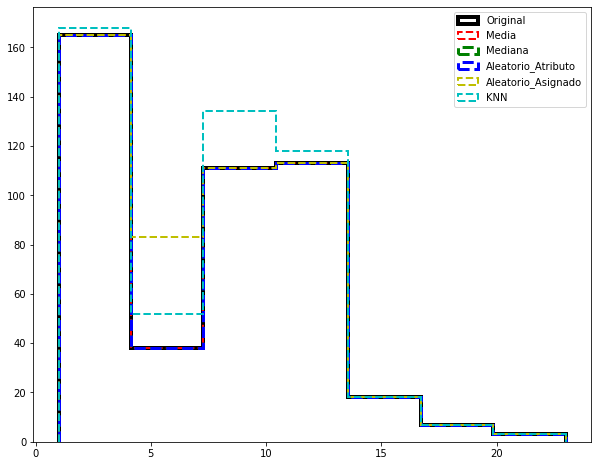

In [23]:
plt.figure(figsize=(10,8)) #3Medida del Grafico
plt.hist(Datos3["Pub hora"],label="Original",color="k",histtype="step",bins=7,lw=4) # Histograma color="k"  negro el histtype="step" evita rellenar las barras bins=clases o numero de barrAS
plt.hist(Datos3["Pub hora"],label="Media",color="r",histtype="step",bins=7,lw=2,linestyle="--") ##lw grosor linea
plt.hist(Datos3["Pub hora"],label="Mediana",color="g",histtype="step",bins=7,lw=3,linestyle="--") ##lw grosor linea
plt.hist(Datos3["Pub hora"],label="Aleatorio_Atributo",color="b",histtype="step",bins=7,lw=3,linestyle="--")
plt.hist(Datos3["Pub hora_random_fixed"],label="Aleatorio_Asignado",color="y",histtype="step",bins=7,lw=2,linestyle="--")
plt.hist(Xtrans ["Pub hora"],label="KNN",color="c",histtype="step",bins=7,lw=2,linestyle="--")
plt.legend()
plt.show()